# Avocado price prediction

In [1]:
import pandas as pd

In [2]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


## Loading data

In [3]:
avocado = pd.read_csv('/Users/admin/Documents/Kira/DataScience/Avocado2/avocado/data/avocado.csv')
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Preparing the df

In [4]:
df = avocado.groupby('Date')['AveragePrice'].mean().to_frame('y').reset_index()

In [5]:
df = df.rename(columns={'Date':'ds'})

In [6]:
df.head()

,ds,y
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


In [7]:
df.tail()

,ds,y
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704
168,2018-03-25,1.346852


## Fitting the model on all data

In [8]:
# instantiation of a new Prophet object and applying the fit method
%time
m = Prophet()
m.fit(df)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.69053
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       450.568     0.0025437       90.0316           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     153       451.677   0.000377962       70.4219   5.872e-06       0.001      251  LS failed, Hessian reset 
     169       451.803    0.00113706       155.253   1.562e-05       0.001      305  LS failed, Hessian reset 
     199       451.866   8.69838e-06       62.4306      0.9591      0.9591      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       451.872    5.9791e-05       78.1015    8.78e-07       0.001      416  LS failed, Hessian reset 
     275       451.878   3.31313e-07       47.6046   4.744e-09       0.001      528  LS failed, Hessian reset 
     285       451.878   3.24623e-08       62.0141      0.5848   

In [9]:
# helper function to create a dataframe including the future dates and historic dates with a column ds that contains these dates, forecasting period is 1 year = 365 days
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24
533,2019-03-25


## Forecasting the avocado prices

In [10]:
# predict method assigns to each row in future a predicted value = yhat  
# for passing historical dates, it provides an in-sample fit
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.362291,1.152576,1.404527,1.285696,1.452811,-0.089941,-0.089941,-0.089941,-0.089941,-0.089941,-0.089941,0.0,0.0,0.0,1.272350
530,2019-03-22,1.361978,1.156674,1.407446,1.285251,1.452835,-0.087688,-0.087688,-0.087688,-0.087688,-0.087688,-0.087688,0.0,0.0,0.0,1.274290
531,2019-03-23,1.361664,1.163700,1.407905,1.284807,1.452709,-0.085102,-0.085102,-0.085102,-0.085102,-0.085102,-0.085102,0.0,0.0,0.0,1.276562
532,2019-03-24,1.361351,1.165824,1.404683,1.284168,1.453000,-0.082210,-0.082210,-0.082210,-0.082210,-0.082210,-0.082210,0.0,0.0,0.0,1.279140
533,2019-03-25,1.361037,1.162083,1.413995,1.283490,1.453142,-0.079047,-0.079047,-0.079047,-0.079047,-0.079047,-0.079047,0.0,0.0,0.0,1.281990


In [11]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
529,2019-03-21,1.272350,1.152576,1.404527
530,2019-03-22,1.274290,1.156674,1.407446
531,2019-03-23,1.276562,1.163700,1.407905
532,2019-03-24,1.279140,1.165824,1.404683
533,2019-03-25,1.281990,1.162083,1.413995


In [12]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,1.346354,1.263871,1.433239
1,2015-01-11,1.354612,1.265758,1.445549
2,2015-01-18,1.351932,1.260315,1.435626
3,2015-01-25,1.327662,1.239479,1.413871
4,2015-02-01,1.293799,1.211674,1.381236


## Plotting the results

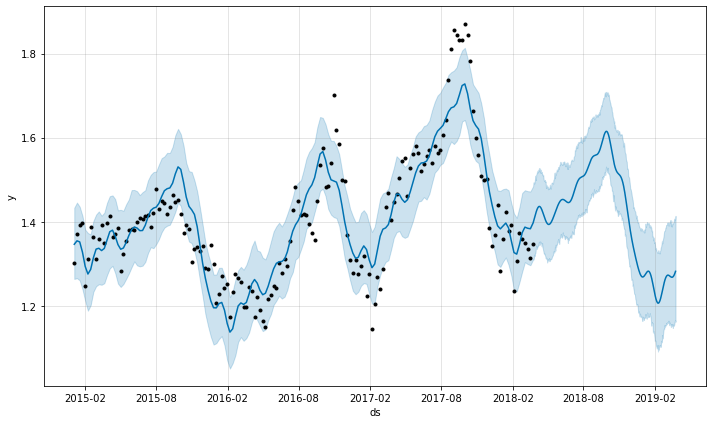

In [13]:
fig1 = m.plot(forecast)

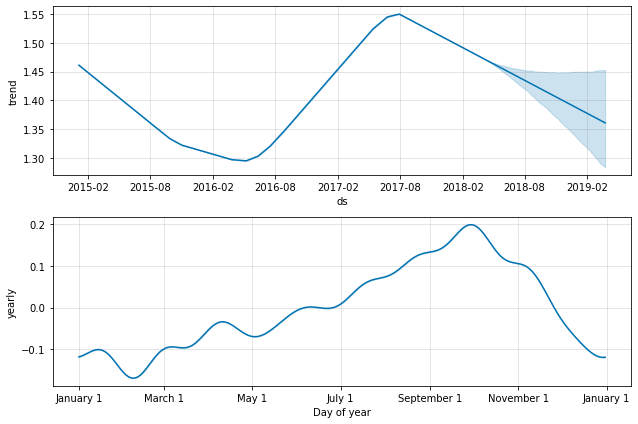

In [14]:
# plot the components individually
fig2 = m.plot_components(forecast)